# Description of EDA Steps:

 Load the Data: The dataset is loaded and basic information is displayed.
 
 Missing Data Check: The presence of any missing values is evaluated.

 Descriptive Statistics: Summary statistics for each variable are shown.

 Distribution Visualization: Histograms for Life Ladder, Social Support, and Log GDP per capita are plotted to visualize their distributions.

 Correlation Analysis: A heatmap shows correlations between different variables, helping identify potential 
 relationships.

## Load the Data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('/Users/bartlomiejpodstawek/PycharmProjects/analiza_danych_projekt/Python_Data_Analytics_Course-main/project_world_happiness_report/World Happiness Report 2024.csv') # '/kaggle/input/world-happiness-report-2024/World Happiness Report 2024.csv'

# Create copy of dataset
df = df.copy()

## Check Basic Information and Missing Data

In [17]:
# Check basic information about the data
print(df.shape)

(2363, 11)


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None


In [19]:
# Check for missing data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


## Cleaning Data and Descriptive Statistics

In [20]:
# Remove rows with missing values
df_cleaned = df.dropna()

print(f"Shape: {df_cleaned.shape}")

Shape: (2097, 11)


In [21]:
# Check if we have duplicates rows
duplicates = df_cleaned[df_cleaned.duplicated() == True]

print(duplicates)

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


In [22]:
# Check descriptive statistics
print(df_cleaned.describe())

              year  Life Ladder  Log GDP per capita  Social support  \
count  2097.000000  2097.000000         2097.000000     2097.000000   
mean   2014.901288     5.466517            9.356037        0.807032   
std       4.965942     1.136941            1.154677        0.123677   
min    2005.000000     2.178809            5.526723        0.290184   
25%    2011.000000     4.611607            8.464981        0.736480   
50%    2015.000000     5.433173            9.496820        0.833816   
75%    2019.000000     6.290690           10.319510        0.905080   
max    2023.000000     7.970892           11.675588        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2097.000000                   2097.000000   
mean                          63.271555                      0.748863   
std                            7.003554                      0.138801   
min                            6.720000                      0.25753

## Visualize Distributions of Key Variables

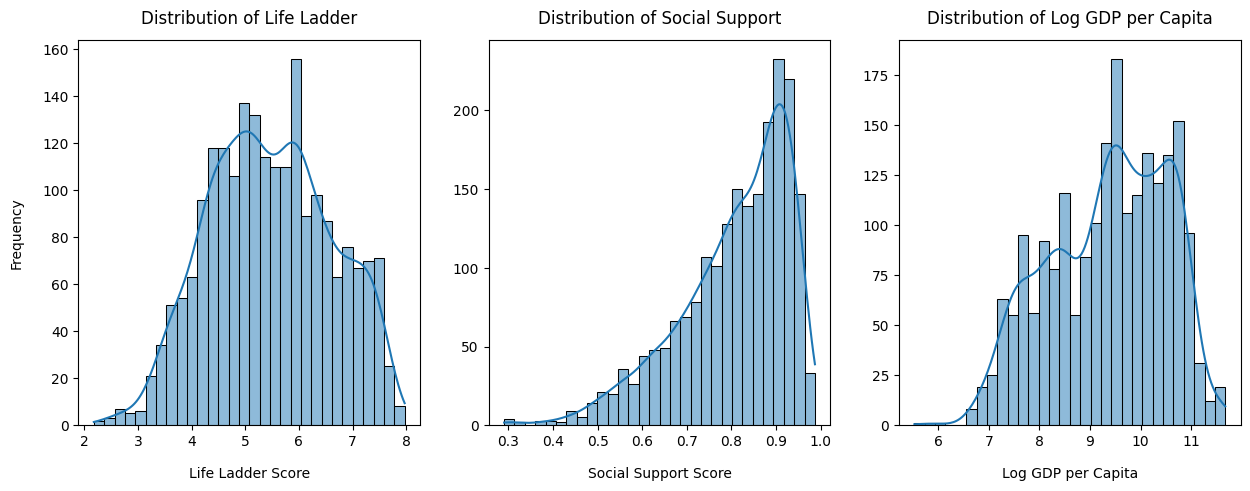

In [23]:
plt.figure(figsize=(15, 5))

# Distribution of Life Ladder
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Life Ladder'], bins=30, kde=True)
plt.title('Distribution of Life Ladder', pad=12)
plt.xlabel('Life Ladder Score', labelpad=13)  
plt.ylabel('Frequency', labelpad=13) 

# Distribution of Social Support
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Social support'], bins=30, kde=True)
plt.title('Distribution of Social Support', pad=12)
plt.xlabel('Social Support Score', labelpad=13)  
plt.ylabel('') 

# Distribution of Log GDP per capita
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Log GDP per capita'], bins=30, kde=True)
plt.title('Distribution of Log GDP per Capita', pad=12)
plt.xlabel('Log GDP per Capita', labelpad=13)  
plt.ylabel('')

plt.subplots_adjust(wspace=0.2)

plt.show()

## Correlation Matrix

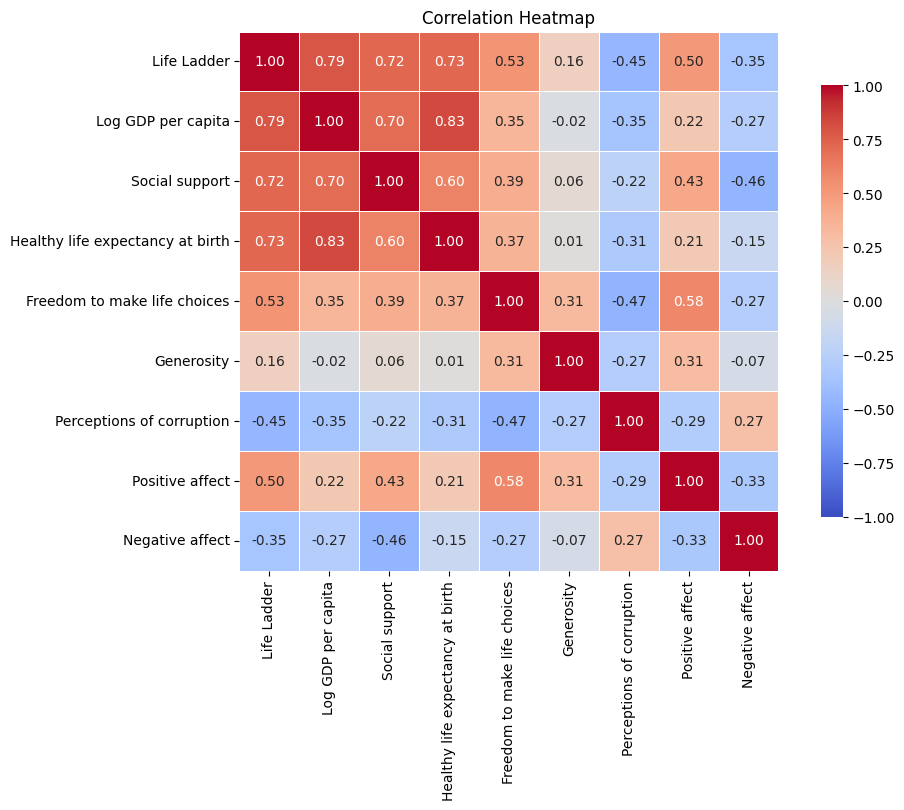

In [24]:
# Correlation Map

plt.figure(figsize=(11, 7))
correlation = df_cleaned[['Life Ladder', 'Log GDP per capita', 'Social support', 
                         'Healthy life expectancy at birth', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption', 'Positive affect', 
                         'Negative affect']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()